# Interpolation of Data Points

Lagrange interpolation, error and Runge phenomenon

*Link to textbook section: [https://numericalmethodssullivan.github.io/ch-extras.html#lagrange-interpolation](https://numericalmethodssullivan.github.io/ch-extras.html#lagrange-interpolation)*

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Newton Divided Differences
#   - Input: List of data point tuples
#   - Output: List of NDD polynomial coefficients
def NewtonDD(data):
  ndd = list(zip(*data))
  n = len(data)
  for j in range(n-1):
    prevColumn = []
    for i in range(n-1-j):
      prevNum = ndd[j+1][i+1] - ndd[j+1][i]
      prevDenom = ndd[0][j+1+i] - ndd[0][i]
      prevColumn.append(prevNum/prevDenom)
    ndd.append(prevColumn)
  return ndd

## Evaluate NDD polynomial at a point x
def polyNDD(ndd,x):
  # Polynomial coeffs are first elements of each column
  n = len(ndd[0])
  polVal = 0
  for col in range(n):
    coeff = ndd[col+1][0]
    prod = 1
    for i in range(col):
      prod *= x-ndd[0][i]
    polVal += coeff * prod
  return polVal


In [ ]:
data = [(0,-2), (4,4), (8,0), (2,1)]
xi, yi = list(zip(*data))

x = np.linspace(min(xi),max(xi),50)
ndd = NewtonDD(data)
y = polyNDD(ndd, x)

plt.plot(x,y,'m')   #interpolating polynomial
plt.plot(xi,yi,'o') #data points
plt.title("Polynomial Interpolation of Given Data (n = {})".format(len(xi)))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# *EX 1:* 

Consider the interpolating polynomial for $f(x)=\dfrac{1}{x+5}$ with interpolation nodes $x=0,2,4,6,8,10$. Find an upper bound for the interpolation error at (a) $x=1$ and (b) $x=5$.

In [ ]:
# Define function and generate data points
f = lambda x: 1/(x+5)
x_fun = np.linspace(0,10,50)
y_fun = f(x_fun)

nodes = [0,2,4,6,8,10]
nodevals = []
for x in nodes:
  nodevals.append(f(x))

data = list(zip(nodes,nodevals))
ndd = NewtonDD(data)
y1 = polyNDD(ndd, 1)
y5 = polyNDD(ndd, 5)

print("Error at x=1:", abs(y1 - f(1)))
print("Error at x=5:", abs(y5 - f(5)))

# *EX 2:*

Interpolate $f(x)=\dfrac{1}{(1+12x^2)}$ at evenly-spaced points in $[-1,1]$, with $n=10$ and $n=20$.

In [ ]:
# Define function and generate data points
f = lambda x: 1/(1+12*x**2)
xvals = np.linspace(-1,1,50)
yvals = f(xvals)

fig, axes = plt.subplots(2, 2, figsize = (15,5))
for i in range(2):
  nodes = np.linspace(-1,1,10*(i+1))
  nodevals = f(nodes)
  
  data = list(zip(nodes,nodevals))
  ndd = NewtonDD(data)
  interpvals = polyNDD(ndd,xvals)

  error = abs(interpvals-yvals)

  #Plot interpolation
  axes[i][0].plot(xvals,interpvals,'m')
  axes[i][0].plot(xvals,yvals,'g')
  axes[i][0].plot(nodes,nodevals,'o')
  axes[i][0].grid()
  axes[i][0].set_title("n = {}".format(len(nodes)))
  axes[i][0].set_xlabel("x")
  axes[i][0].set_ylabel("y")

  #Plot error
  axes[i][1].plot(xvals,error,'m')
  axes[i][1].grid()
  axes[i][1].set_title("Error (n = {})".format(len(nodes)))
  axes[i][1].set_xlabel("x")
  axes[i][1].set_ylabel("y")

fig.suptitle('Polynomial Interpolation of $f(x)=1/(1+12x^2)$', fontsize=16)
plt.show()

# *EX 3:*

(a) Find the degree 2 interpolating polynomial through $(1,0)$, $(2,\ln2)$, $(4,
\ln4)$.

(b) Use the interpolating polynomial to approximate $\ln 3$.

(c) Use the error formula to determine an upper bound for the error in approximating $\ln 3$, and check against actual error.

In [ ]:
data = [(1,0), (2,math.log(2)), (4,math.log(4))]
xi, yi = list(zip(*data))

x = np.linspace(min(xi),max(xi),50)
ndd = NewtonDD(data)
y = polyNDD(ndd, x)

yexact = []
for point in x:
  yexact.append(math.log(point))

plt.plot(x,y,'m')   #interpolating polynomial
plt.plot(x,yexact,'g')  #exact function ln(x)
plt.plot(xi,yi,'o') #data points
plt.title("Polynomial Interpolation of Given Data (n = {})".format(len(xi)))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

y = polyNDD(ndd, 3)
print("ln3 = ", y)
print("Actual error:", abs(math.log(3) - y))


# Chebyshev Interpolation

The Chebyshev nodes on general interval $[a,b]$:

$$
x_i = \frac{b+a}{2} + \frac{b-a}{2}\cos \left( \frac{2i-1}{2n} \pi\right), \;\; i = 1,2,\ldots,n
$$

In [16]:
def chebyshev(a,b,n):
    pfrac = (b+a)/2
    mfrac = (b-a)/2
    nodes = []
    for i in range(1,n+1):
        xi = pfrac + mfrac*np.cos((2*i-1)/(2*n)*np.pi)
        if abs(xi) > 2**(-52):
            nodes.append(xi)
        else:
            nodes.append(0)
    return nodes      

In [17]:
print(chebyshev(-1,1,3))
np.sqrt(3)/2

[0.8660254037844387, 0, -0.8660254037844387]


0.8660254037844386

Ex. 4: Redo *Ex. 2* using Chebyshev Interpolation

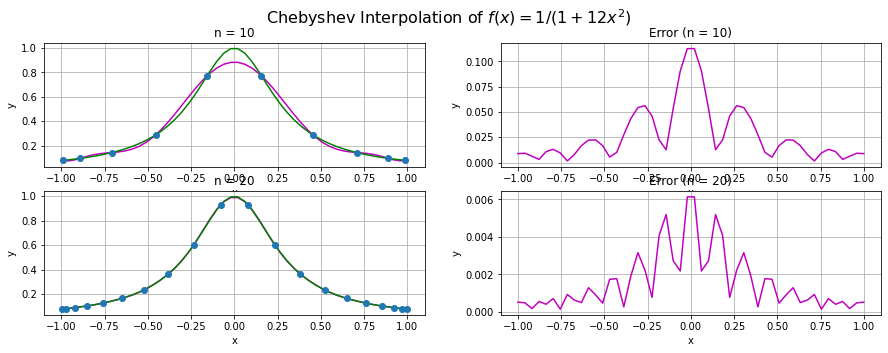

In [21]:
f = lambda x: 1/(1+12*x**2)
xvals = np.linspace(-1,1,50)
yvals = f(xvals)

fig, axes = plt.subplots(2, 2, figsize = (15,5))
for i in range(2):
  #nodes = np.linspace(-1,1,10*(i+1)) from Lagrange: equally spaced nodes
  nodes = chebyshev(-1,1,10*(i+1))
  nodevals = []
  for node in nodes:
      nodevals.append(f(node))
  
  data = list(zip(nodes,nodevals))
  ndd = NewtonDD(data)
  interpvals = polyNDD(ndd,xvals)

  error = abs(interpvals-yvals)

  #Plot interpolation
  axes[i][0].plot(xvals,interpvals,'m')
  axes[i][0].plot(xvals,yvals,'g')
  axes[i][0].plot(nodes,nodevals,'o')
  axes[i][0].grid()
  axes[i][0].set_title("n = {}".format(len(nodes)))
  axes[i][0].set_xlabel("x")
  axes[i][0].set_ylabel("y")

  #Plot error
  axes[i][1].plot(xvals,error,'m')
  axes[i][1].grid()
  axes[i][1].set_title("Error (n = {})".format(len(nodes)))
  axes[i][1].set_xlabel("x")
  axes[i][1].set_ylabel("y")

fig.suptitle('Chebyshev Interpolation of $f(x)=1/(1+12x^2)$', fontsize=16)
plt.show()